In [56]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [57]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [58]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    
    # add additional convolutional layers
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    
    # add pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # add dropout layer
    model.add(Dropout(0.25))
    
    # flatten the data
    model.add(Flatten())
    
    # add dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    # add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    return model

# create the CNN model
model = create_CNN()


In [60]:
from tensorflow.keras.utils import to_categorical

# Convert the target labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


# training parameters
batch_size = 32
epochs = 20

# create the deep conv net
model_CNN = create_CNN()


# train CNN
history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
1875/1875 [==============================] - 18s 10ms/step - loss: 1.7357 - accuracy: 0.4588 - val_loss: 0.4495 - val_accuracy: 0.8620
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3655 - accuracy: 0.8867 - val_loss: 0.1603 - val_accuracy: 0.9475
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1883 - accuracy: 0.9425 - val_loss: 0.0983 - val_accuracy: 0.9691
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1435 - accuracy: 0.9567 - val_loss: 0.0925 - val_accuracy: 0.9709
Epoch 5/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1218 - accuracy: 0.9627 - val_loss: 0.0775 - val_accuracy: 0.9747
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1044 - accuracy: 0.9689 - val_loss: 0.0773 - val_accuracy: 0.9756
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0948 - accuracy: 0.9707 - val_loss: 0.0568 - 

313/313 [==============================] - 1s 4ms/step - loss: 0.0472 - accuracy: 0.9867
Test loss: 0.04718150198459625
Test accuracy: 0.9866999983787537


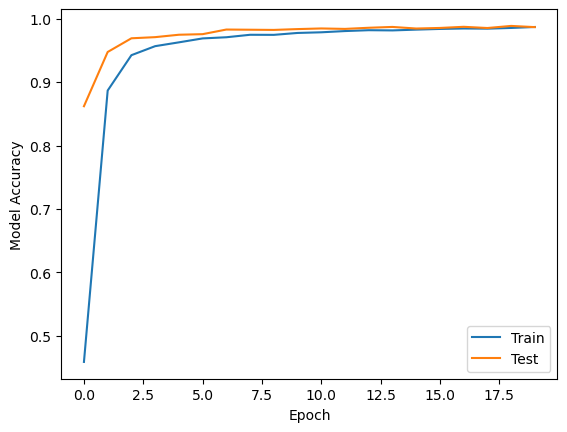

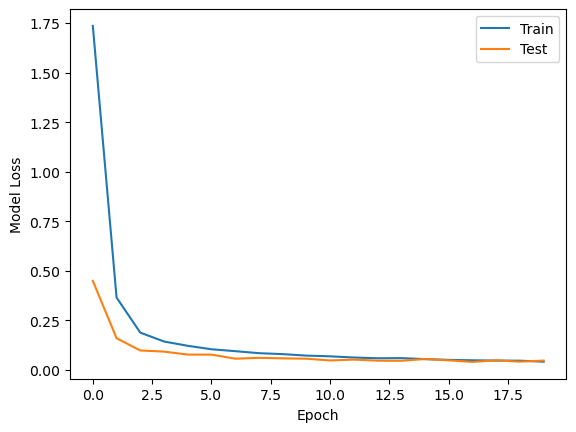

In [61]:
# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look into training history
if 'accuracy' in history.history:
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Model Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

if 'loss' in history.history:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Model Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()


313/313 [==============================] - 1s 4ms/step


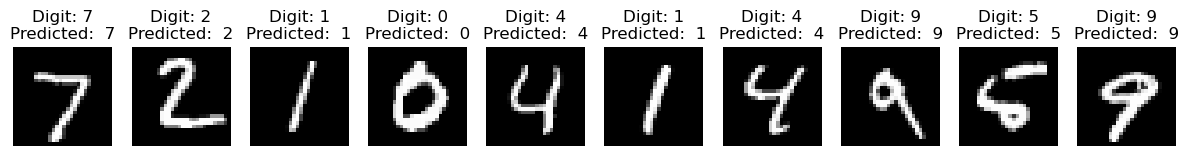

In [66]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:  {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [62]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_45
1 conv2d_46
2 conv2d_47
3 max_pooling2d_15
4 dropout_14
5 flatten_14
6 dense_42
7 dense_43
8 dense_44


(5, 5, 1, 10)


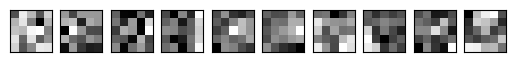

In [63]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()